# COURSE: A deep understanding of deep learning
## SECTION: Gradient descent
### LECTURE: Gradient descent in 1D
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/dudl/?couponCode=202208

In [2]:
# import all necessary modules
import numpy as np
import matplotlib.pyplot as plt

from IPython import display
display.set_matplotlib_formats('svg')

/tmp/ipykernel_14318/1582677321.py:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


# Gradient descent in 1D

In [3]:
# function (as a function)
def fx(x):
  return np.cos(2*np.pi*x)+x*x

# derivative function
def deriv(x):
  return -2*np.pi*np.sin(2*np.pi*x)+2*x

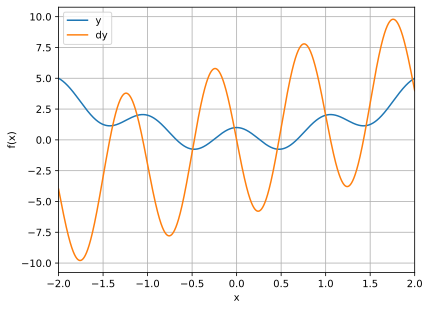

In [4]:
# plot the function and its derivative

# define a range for x
x = np.linspace(-2,2,2001)

# plotting
plt.plot(x,fx(x), x,deriv(x))
plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['y','dy'])
plt.show()

In [5]:
THRESHOLD = .0001
# random starting point

x = np.linspace(.1,3,100)
x_0 = np.linspace(-3,3,100)

# learning parameters
learning_rates = THRESHOLD*x

In [6]:
# random starting point
startinglocalmin = np.random.choice(x,1)
# startinglocalmin = 0
localmin = startinglocalmin
# learning parameters
learning_rate = .2
training_epochs = 100
# run through training
modelparameters = np.zeros((training_epochs, 2))
for i in range(training_epochs):
  grad = deriv(localmin)
  localmin = localmin - learning_rate*grad
  modelparameters[i,:] = localmin, grad

/tmp/ipykernel_14318/970496385.py:13: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  modelparameters[i,:] = localmin, grad


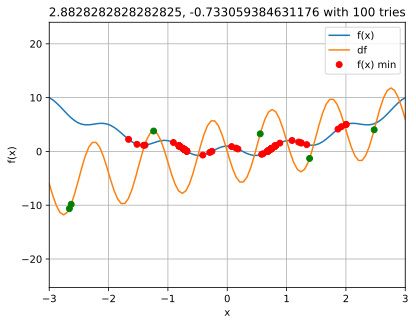

In [7]:
# plot the results

plt.plot(x_0,fx(x_0))
plt.plot(x_0,deriv(x_0))
plt.plot(modelparameters[:,0],fx(modelparameters[:,0]),'ro')
plt.plot(modelparameters[:,1],deriv(modelparameters[:,1]),'go')

plt.xlim(x_0[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['f(x)','df','f(x) min'])
plt.title('%s, %s with %s tries'%(startinglocalmin[0],localmin[0], training_epochs))
plt.show()

In [ ]:
# Store the model parameters and outputs on each iteration

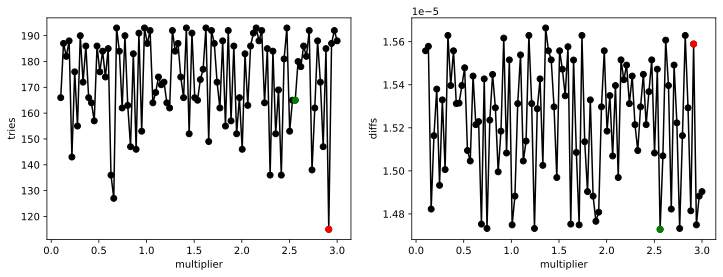

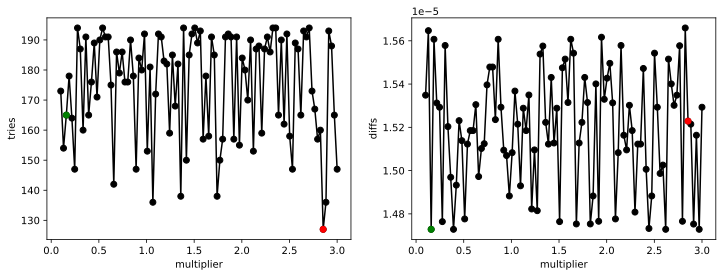

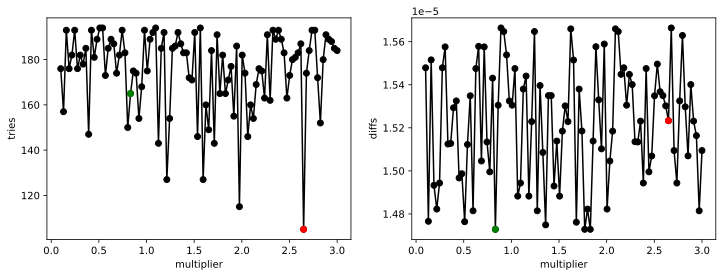

In [98]:
for k in range(3):
    i_s = np.zeros(len(x))
    diffs = np.zeros(len(x))
    # run through training and store all the results
    for j in range(len(x)):
      localmin = np.random.choice(x,1)
      i=0
      grad = THRESHOLD
      while abs(grad) >= THRESHOLD:
        grad = deriv(localmin)
        localmin = localmin - learning_rate*grad
        i+=1
      i_s[j] = i
      diffs[j] = abs(localmin-.5)


    fig, ax = plt.subplots(1,2,figsize=(12,4))

    i_s_argmin = i_s.argmin()
    diffs_argmin = diffs.argmin()


    ax[0].plot(x,i_s,"ko-")
    ax[0].plot(x[i_s_argmin],i_s[i_s_argmin],"ro")
    ax[0].plot(x[diffs_argmin],i_s[diffs_argmin],"go")
    ax[0].set_xlabel("multiplier")
    ax[0].set_ylabel("tries")

    ax[1].plot(x,diffs,"ko-")
    ax[1].plot(x[i_s_argmin],diffs[i_s_argmin],"ro")
    ax[1].plot(x[diffs_argmin],diffs[diffs_argmin],"go")
    ax[1].set_xlabel("multiplier")
    ax[1].set_ylabel("diffs")

    plt.savefig(f"idif{k}.png")

# Additional explorations

In [ ]:
# 1) Most often in DL, the model trains for a set number of iterations, which is what we do here. But there are other ways
#    of defining how long the training lasts. Modify the code so that training ends when the derivative is smaller than 
#    some threshold, e.g., 0.1. Make sure your code is robust for negative derivatives.
# 
# 2) Does this change to the code produce a more accurate result? What if you change the stopping threshold?
# 
# 3) Can you think of any potential problems that might arise when the stopping criterion is based on the derivative 
#    instead of a specified number of training epochs?
# 